При фиксированном парамтере $r$ характеристики дуального кода Хэмминга: $n = 2^r - 1, k = r, d = 2^{r - 1}$

Для двоичного кода граница Хэмминга имеет вид $2^k \leq \dfrac{2^n}{\sum\limits_{i = 0}^t C_n^i}$, где $t = floor (\dfrac{d - 1}{2})$, что можно преобразовать в $\sum\limits_{i = 0}^t C_n^i \leq 2^{n - k}$

Граница Варшамова-Гильберта для двоичного кода имеет вид: $\sum\limits_{i = 0}^{d - 2} C_{n - 1}^i < 2^{n - k}$

Граница Грайсмера же имеет вид: $N(k, d) \geq \sum\limits_{t = 0}^{k - 1}ceil(\dfrac{d}{2^i})$

Так как анлитически эти неравенства решать слишком трудоёмко, то будем решать их численным перебором для разумных $(n, k)$

In [11]:
import scipy.special as sc
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import math

In [12]:
def get_dual_params(r):
    n = (2 ** r) - 1
    k = r
    d = 2 ** (r - 1)
    return n, k, d

In [13]:
def comb(n, k):
    return sc.comb(n, k, exact=True)

def get_hamming_border(n, k):
    t = 0
    cur_sum = comb(n, t)
    while cur_sum + comb(n, t + 1) <= 2 ** (n - k):
        cur_sum += comb(n, t + 1)
        t += 1
    return t * 2 + 2

def get_hilbert_border(n, k):
    if (n == k):
        return 1
    prev_prev_d = 0
    cur_sum = comb(n - 1, prev_prev_d)
    while cur_sum + comb(n - 1, prev_prev_d + 1) < 2 ** (n - k):
        cur_sum += comb(n - 1, prev_prev_d + 1)
        prev_prev_d += 1
    return prev_prev_d + 2

def get_graysmer_border(k, d):
    total_sum = 0
    for i in range(k):
        total_sum += math.ceil(d / (2 ** i))
    return total_sum

In [16]:
rs = list(range(1, 12))
hammings = []
hilberts = []
graysmers = []
ds = []
ns = []
ks = []

In [17]:
for r in tqdm(rs):
    n, k, d = get_dual_params(r)
    hamming = get_hamming_border(n, k)
    hilbert = get_hilbert_border(n, k)
    graysmer = get_graysmer_border(k, d)
    ds.append(d)
    hammings.append(hamming)
    hilberts.append(hilbert)
    graysmers.append(graysmer)
    ns.append(n)
    ks.append(k)

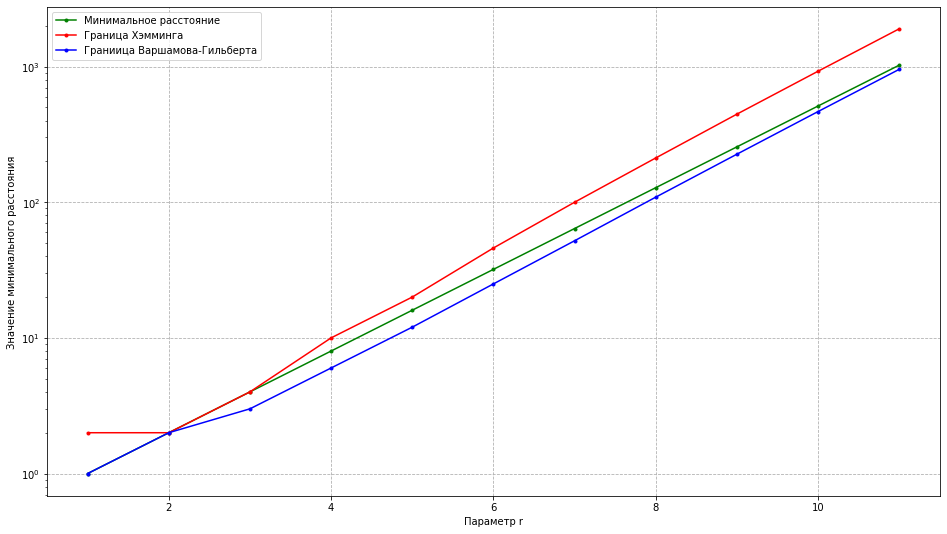

In [12]:
plt.figure(figsize=(16,9))
plt.grid(linestyle='--', )
plt.semilogy(rs, ds, linestyle='-',marker='.',color='g', label='Минимальное расстояние')
plt.semilogy(rs, hammings, linestyle='-',marker='.',color='r', label='Граница Хэмминга')
plt.semilogy(rs, hilberts, linestyle='-',marker='.',color='b', label='Граниица Варшамова-Гильберта')
plt.xlabel('Параметр r')
plt.ylabel('Значение минимального расстояния')
plt.legend()
plt.show()

Из графиков видно, что с увелечением $r$(что эквивалентно увеличению длины) минимальное расстояние удаляется от границы Хэмминга и приближается к границе Варшамова-Гильберта

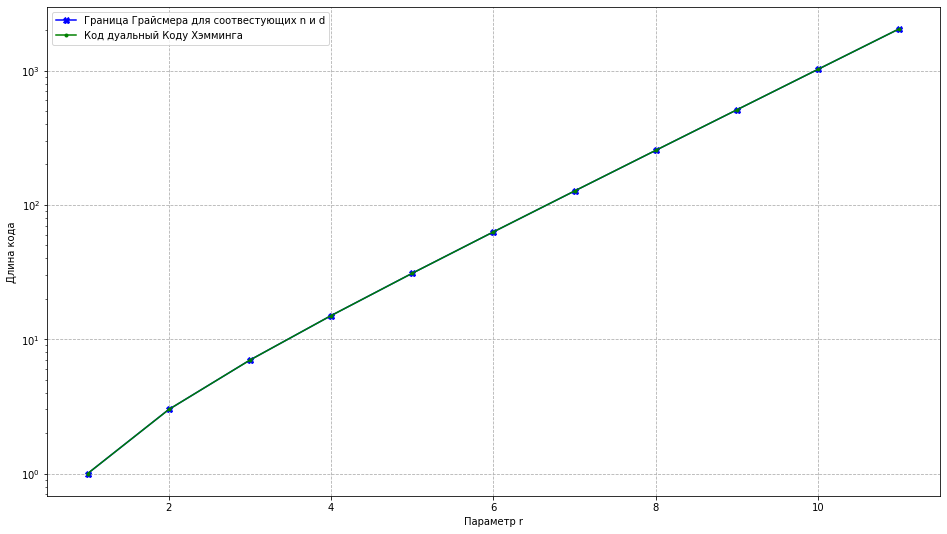

In [33]:
plt.figure(figsize=(16,9))
plt.grid(linestyle='--', )
plt.semilogy(rs, graysmers, linestyle='-',marker='X',color='b', label='Граница Грайсмера для соотвестующих n и d')
plt.semilogy(rs, ns, linestyle='-',marker='.',color='g', label='Код дуальный Коду Хэмминга')
plt.xlabel('Параметр r')
plt.ylabel('Длина кода')
plt.legend()
plt.show()

Как и ожидалось эти коды лежат строго на границе Грайсмера. Это можно показать посмотрев на их поражающую матрицу.

Мы знаем, что для них $k = r, d = 2^{r - 1}$, а матрица $G$ же имеет вид $\begin{pmatrix}0^{n - d}\ 1^d\\G_1\ G_2\end{pmatrix}$ При этом $G_1$ является дуальным кода Хэмминга для r' = r - 1 = k - 1

Заметим, что это полностью совпадает с видом матрицы $G$ из доказательства границы Грайсмера, так же легкго показать, что при $r = 1, d = 2^{r - 1} = 1$, дуальный код Хэмминга действительно имеет минималную возможную длину $n = 2^r - 1 = 1$, ведь это просто передача одного бита как есть, меньше мы уже не сможем.

К тому же в силу того, что $d = 2^{r - 1}$ - степеь двойки, то сумма в формуле границы грайсмера превращается в сумму степеней двойки от $0$ до $r - 1$ включительно, что в точности равно $2^r - 1$, чему и равна длина соотвествующего дуального код Хэмминга. 